# A3: Visualization for Exploratory Data Analysis

* [Exploratory real estate data analysis](#EDA)
* [Submission](#Submission)

## Objective

The main focus of [this course](https://courses.cs.sfu.ca/2022sp-cmpt-733-g1) is on data science. [Lecture 3](https://sfu-db.github.io/bigdata-cmpt733/Lectures/lec3.pdf) gave you an overview of Visualization. After completing this assignment, you should be able to confidently perform visual data analysis using Python and gain some experience with geospatial data.

As a motivating example of how visualization can bring data to life and clear up misconceptions, consider to watch [Hans Rosling's famous TED talks](https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo), e.g. "The best stat's you've ever seen" from 2006.

## Real Estate EDA

**Real estate data**

Imagine you are data scientist working at a real-estate company. In this week, your job is to analyze Vancouver housing prices. First, inspect the dataset provided in [property_tax_report_2021.zip](property_tax_report_2021.zip). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2021.
You can find the schema information of the dataset from the [Vancouver Open Data Portal](https://opendata.vancouver.ca/explore/dataset/property-tax-report/information/).
Familiarize yourself with the context and background info on that page before diving deeper into Exploratory Data Analysis.

We first load the data as a DataFrame. To make this analysis more interesting, we will add two new columns to the data: `CURRENT_PRICE` represents the property price in 2021; `PREVIOUS_PRICE` represents the property price in 2020.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
def displaymd(mdstr):
    display(Markdown(mdstr))

In [2]:

# use this in case you have a hidpi display and figures appear blurry
#%config InlineBackend.figure_format = 'retina'

# before running this, unzip the provided data
df = pd.read_csv("data/property_tax_report_2021.csv", sep=';')

df['CURRENT_PRICE'] = df.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df['PREVIOUS_PRICE'] = df.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)


Now let's start the EDA process. 

**Hint.** For some of the following questions, we provided an example plot (see [link](https://rawgit.com/sfu-db/bigdata-cmpt733/master/Assignments/A3/A3-plots.html)). But note that you do not have to use the same plot design. In fact, we didn't do a good job to follow the *Principles of Visualization Design* in the second half of the slides of [Lecture 3](https://sfu-db.github.io/bigdata-cmpt733/Lectures/lec3.pdf), please review this part by yourself.
You should think about how to correct the bad designs in my plots.

### Question 1. Look at some example rows
Print the first five rows of the data:

In [3]:
# --- Write your code below ---
df.head()

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONING_DISTRICT,ZONING_CLASSIFICATION,LOT,PLAN,BLOCK,DISTRICT_LOT,...,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
0,002-582-759,STRATA,90717090036,9071709,CD-1 (94),Comprehensive Development,36,VAS452,NaN,526,...,2021.0,1015000.0,115000.0,1977.0,1977.0,3644.37,4,2021,1247000.0,1130000.0
1,010-772-278,LAND,692077380000,69207738,RS-1,One-Family Dwelling,22,VAP6923,511,526,...,2021.0,2759000.0,463000.0,1991.0,1991.0,12528.80,4,2021,3421000.0,3222000.0
2,009-746-986,LAND,79715270000,7971527,RS-1,One-Family Dwelling,8,VAP9119,560,526,...,2021.0,2958000.0,278000.0,1955.0,1975.0,11602.60,4,2021,3488000.0,3236000.0
3,008-199-809,LAND,742030860000,74203086,RS-5,One-Family Dwelling,12,VAP5959,18,2027,...,2021.0,3204000.0,521000.0,1989.0,1989.0,15046.20,3,2021,3920000.0,3725000.0
4,004-429-435,LAND,723032140000,72303214,RS-5,One-Family Dwelling,32,VAP4499,60,2027,...,2021.0,2720000.0,256000.0,1986.0,1986.0,11135.00,3,2021,3122000.0,2976000.0


### Question 2. Get summary statistics

From the above output, you will know that the data has 28 columns. Please use the describe() function to get the summary statistics of each column.
Also, to improve readability use a pandas [DataFrame Styler](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) to format the numbers without scientific notation (i.e. no floating point exponent).

In [4]:
# --- Write your code below ---
df.describe().style.format("{:.2f}")

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
count,650847.00,650847.00,649178.00,642149.00,642149.00,642149.00,634890.00,634890.00,622538.00,622538.00,426393.00,650847.00,650847.00,642149.00,634890.00
mean,498730471748.08,49873047.17,2381.41,1709920.16,436542.00,2021.01,1714975.90,408908.72,1983.35,1990.93,8356.72,16.54,2021.01,2146462.15,2123884.61
std,249280578035.75,24928057.81,1989.22,9876736.00,4424333.36,0.82,9868571.45,4087834.81,29.63,19.49,57341.15,8.95,0.82,12132261.01,11923651.16
min,19632060000.00,1963206.00,1.00,0.00,0.00,2020.00,0.00,0.00,1800.00,200.00,0.00,1.00,2020.00,0.00,0.00
25%,210710030034.00,21071003.00,939.00,481000.00,101000.00,2020.00,480000.00,97200.00,1972.00,1980.00,1911.31,9.00,2020.00,669000.00,664000.00
50%,612275650000.00,61227565.00,1777.00,956000.00,193000.00,2021.00,963000.00,186000.00,1993.00,1994.00,3926.26,16.00,2021.00,1183000.00,1178000.00
75%,690033505000.00,69003350.50,3336.00,1576000.00,317000.00,2022.00,1516000.00,305000.00,2005.00,2005.00,6589.01,25.00,2022.00,1872000.00,1803000.00
max,845313420000.00,84531342.00,31888.00,3488433000.00,693426000.00,2022.00,3165054000.00,652775000.00,2019.00,2019.00,8621182.00,30.00,2022.00,3496582000.00,3172855000.00


Please look at the above output carefully, and make sure that you understand the meanings of each row (e.g., std, 25% percentile).

### Question 3. Examine missing values

Now we are going to perform EDA on a single column (i.e., univariate analysis). We chose `YEAR_BUILT`, which represents in which year a property was built.  We first check whether the column has any missing value. 

In [5]:
# --- Write your code below ---
# Print the percentage of the rows whose YEAR_BUILT is missing.
x=df[df["YEAR_BUILT"].isnull()==True]
print('{:.2f}%'.format(len(x["YEAR_BUILT"])*100/len(df)))

4.35%


Missing values are very common in real-world datasets. In practice, you should always be aware of the impact of the missing values on your downstream analysis results.

### Question 4.  Plot a line chart

We now start investigating the values in the `YEAR_BUILT` column.  Suppose we want to know: "How many properties were built in each year (from 1990 to 2018)?" Please plot a line chart to answer the question.

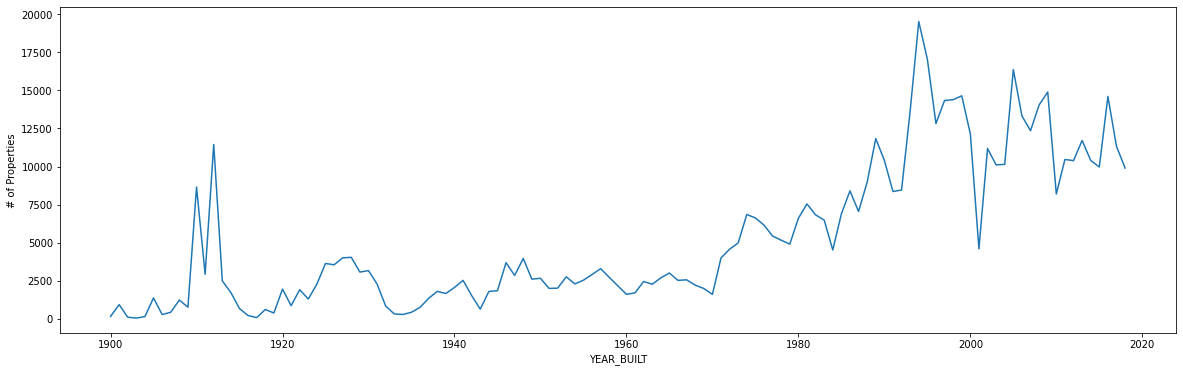

In [6]:
# --- Write your code below ---
x1=df[["YEAR_BUILT","LAND_COORDINATE"]].groupby(by="YEAR_BUILT",group_keys=False,as_index=False).count()
x11=x1[x1["YEAR_BUILT"]>=1900]
x11=x11[x11["YEAR_BUILT"]<=2018]
plt.figure(figsize=(20, 6))
plt.plot(x11["YEAR_BUILT"],x11["LAND_COORDINATE"])
plt.xlabel("YEAR_BUILT")
plt.ylabel("# of Properties")
plt.show()


Please write down the **two** most interesting findings that you draw from the plot. For example, you can say: <font color='blue'>"Vancouver has about 6300 properties built in 1996 alone, which is more than any other year"</font>.

**Findings**
1. In the first half of 20th century, Number of homes built in 1912 (11451) is unsually high when compared to all the years in the first half of 20th centuy.
2. The number of homes built saw sudden dips in 2001 and 2010 compared to previous year and the following year.

### Question 5. Plot a bar chart

Next, we want to find that, between 1900 and 2021, which years have the most number of properties been built? Plot a bar chart to show the top 20 years. 

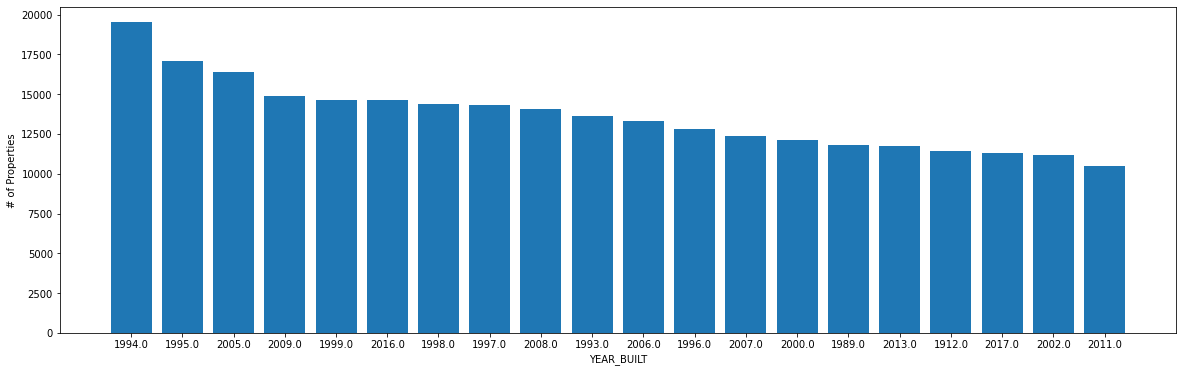

In [7]:
# --- Write your code below ---
x2=x1[x1["YEAR_BUILT"]>=1900]
x2=x2["YEAR_BUILT"].astype(str),x2["LAND_COORDINATE"]
x2=pd.DataFrame(x2)
x2=x2.T
x2=x2.sort_values(by=['LAND_COORDINATE'],ascending=False)
x2=x2[0:20]
plt.figure(figsize=(20, 6))
plt.bar(x2["YEAR_BUILT"],x2["LAND_COORDINATE"])
plt.xlabel("YEAR_BUILT")
plt.ylabel("# of Properties")
plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. The 7 continous years (1994-2000) are in top 20.
2. Most of the years are in end of the 20th century and at the dawn of 21st century. With the exception of 1912 which is in early 20th century. S0 1912 is an outlier.

### Question 6. Plot a histogram

What's the distribution of the number of properties built between 1990 and 2020? Please plot a histogram to answer this question.

Text(0, 0.5, 'Frequency')

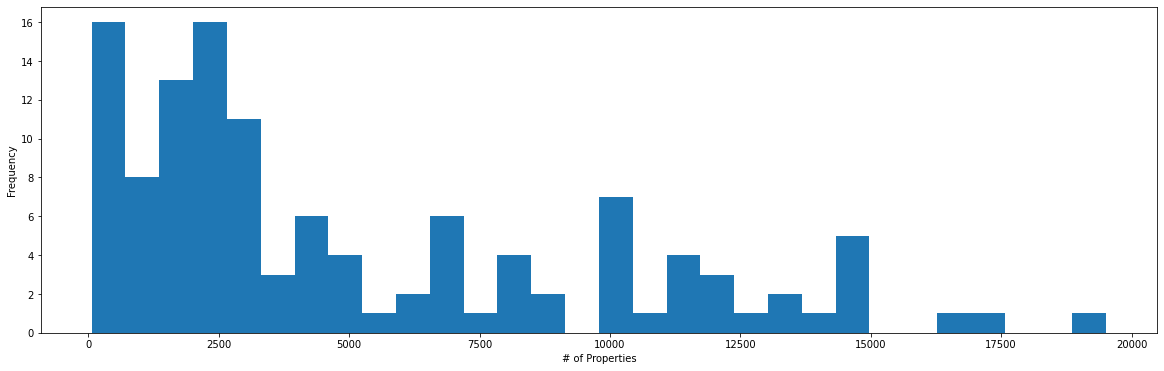

In [8]:
# --- Write your code below ---
x3=x1[x1["YEAR_BUILT"]>=1900]
x3=x3[x3["YEAR_BUILT"]<=2020]
#x3=x3.sort_values(by=['LAND_COORDINATE'],ascending=True)
plt.figure(figsize=(20,6))
plt.hist(x3["LAND_COORDINATE"],bins=30)
plt.xlabel("# of Properties")
plt.ylabel('Frequency')

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. The distribution of number of homes built every year between 1900 and 2020 is in decreasing form, With less than 2500 homes being the highest and decreasing towards 20000 homes with some outliers in the middle. In other words generally, Number of homes built every year tends to in the range of less than 2500.
2. Number of homes built every year is null, when it comes to range of 15000 to 16000 and between 1770 and 1900.

### Question 7. Make a scatter plot

Suppose we are interested in those years which built more than 2000 properties. Make a scatter plot to examine whether there is a relationship between the number of built properties and the year?

Text(0.5, 0, '# of Properties')

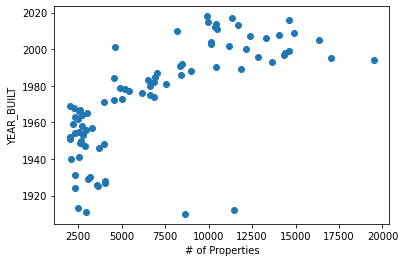

In [9]:
x4=x1[x1["LAND_COORDINATE"]>2000]
plt.scatter(x4["LAND_COORDINATE"],x4["YEAR_BUILT"])
plt.ylabel("YEAR_BUILT")
plt.xlabel("# of Properties")

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. From 1960 to 2020, number of homes is directly proportional to year_built.
2. Number of homes built in 1912 and 1910 are outliers with unusually high numbers.

### Step 8. Obtain geographic coordinates for Canadian postal codes

The property data carries Canadian postal codes, but latitude/longitude coordinates would be much more useful. Unfortunately, geolocations of Canadian postal codes are protected by copyright and the information has to be purchased. Fortunately, you already paid for it with your tuition...

Statistics Canada has a protected dataset, the postal code conversion file, which is available to SFU students via the Abacus Dataverse. Please follow these steps:
* Have a valid SFU account (not sure if alumni account would work)
* Connect to the Abacus Data Network via https://databases.lib.sfu.ca/record/61245148090003610/Abacus-Data-Network
* Connecting via the above link should show you as logged in user at https://abacus-library-ubc-ca.proxy.lib.sfu.ca/
* Search for: **Postal Code Conversion File May 2021**
* Download files: **pccfNat_fccpNat_052021.txt** and the [2021 PCCF Guide .pdf](https://abacus.library.ubc.ca/file.xhtml?persistentId=hdl:11272.1/AB2/9J8YUH/WJHERN&version=1.0) and place them in the same folder as this notebook.

#### Details about the dataset in the 2021 PCCF Guide
* Description of available fields for each postal code, see Content section, pp. 9
* Offsets and Size of fields to extract from lines in Postal Code Conversion File, Table 4.1, p. 11.  
  This is also included along with this notebook as **pccf_record_layout.csv**

In [10]:
rldf = pd.read_csv('pccf_record_layout.csv')
# load the raw text pccf file
with open('pccfNat_fccpNat_052021.txt','r', encoding='latin-1') as fh:
    pctxt = fh.read()
pclines = pctxt.split('\n')
pclines = list(filter(lambda l: len(l), pclines)) # keep only non-empty lines
displaymd(f"Number of lines in PCCF: {len(pclines):,}")

Number of lines in PCCF: 1,742,403

In [11]:
pclines

['A0A1A0A0A1010011001144Aquaforte                                                             T  21499979910.001099101000100009100107450003  47.011133   -52.93662115AQUAFORTE                     WW19830801190000012NNN40',
 'A0A1B0A0A1010011001464Avondale                                                              T  47299649910.001099101000100009100105620003  47.400311   -53.22148513AVONDALE                      WW19830401190000012NNN40',
 'A0A1C0A0A1010011001557Bay Bulls                                                             T  51900110110.001099101000799100100106840042  47.318593   -52.81656503BAY BULLS                     WW19830401190000011BAN11',
 'A0A1C0A0A1010011001557Bay Bulls                                                             T  51900110110.001099101000799100100106840032  47.320404   -52.81588203BAY BULLS                     WW19830401190000011BAN11',
 'A0A1C0A0A1010011001557Bay Bulls                                                             T  51900110110.001

In [12]:
df1=pd.DataFrame(pclines)
df1

,0
0,A0A1A0A0A1010011001144Aquaforte ...
1,A0A1B0A0A1010011001464Avondale ...
2,A0A1C0A0A1010011001557Bay Bulls ...
3,A0A1C0A0A1010011001557Bay Bulls ...
4,A0A1C0A0A1010011001557Bay Bulls ...
...,...
1742398,V3A8C9V3A5959155915001Langley ...
1742399,V3A8C9V3A5959155915002Langley ...
1742400,V3Z0T8V3Z5959155915004Surrey ...
1742401,V5H4J1V5H5959155915025Burnaby ...


The following extraction of substrings works, but is *very slow*. Please use [pandas string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods) to make this faster.  
**TODO** write your improved code here.

In [16]:
pccf_df=pd.DataFrame()

In [17]:
for idx,r in rldf.iterrows():
    print(r['Position'],r["Field name"])
    iter_key=r["Field name"]
    pccf_df[iter_key]=df1[0].str.slice(start=r['Position']-1,stop=r['Position']+r['Size']-1)

1 Postal code
7 FSA
10 PR
12 CDuid
16 CSDuid
23 CSDname
93 CSDtype
96 CCScode
99 SAC
102 SACtype
103 CTname
110 ER
112 DPL
116 FED13uid
121 POP_CNTR_RA
125 POP_CNTR_RA_type
126 DAuid
134 Dissemination block
137 Rep_Pt_Type
138 LAT
149 LONG
162 SLI
163 PCtype
164 Comm_Name
194 DMT
195 H_DMT
196 Birth_Date
204 Ret_Date
212 PO
213 QI
216 Source
217 POP_CNTR_RA_SIZE_CLASS


In [18]:
pccf_df

,Postal code,FSA,PR,CDuid,CSDuid,CSDname,CSDtype,CCScode,SAC,SACtype,...,PCtype,Comm_Name,DMT,H_DMT,Birth_Date,Ret_Date,PO,QI,Source,POP_CNTR_RA_SIZE_CLASS
0,A0A1A0,A0A,10,1001,1001144,Aquaforte ...,T,214,999,7,...,5,AQUAFORTE,W,W,19830801,19000001,2,NNN,4,0
1,A0A1B0,A0A,10,1001,1001464,Avondale ...,T,472,996,4,...,3,AVONDALE,W,W,19830401,19000001,2,NNN,4,0
2,A0A1C0,A0A,10,1001,1001557,Bay Bulls ...,T,519,001,1,...,3,BAY BULLS,W,W,19830401,19000001,1,BAN,1,1
3,A0A1C0,A0A,10,1001,1001557,Bay Bulls ...,T,519,001,1,...,3,BAY BULLS,W,W,19830401,19000001,1,BAN,1,1
4,A0A1C0,A0A,10,1001,1001557,Bay Bulls ...,T,519,001,1,...,4,BAY BULLS,W,W,19830401,19000001,2,NNN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742398,V3A8C9,V3A,59,5915,5915001,Langley ...,DM,001,933,,...,3,LANGLEY,K,K,20170501,19000001,2,NNN,4,
1742399,V3A8C9,V3A,59,5915,5915002,Langley ...,CY,001,933,,...,3,LANGLEY,K,K,20170501,19000001,2,NNN,4,
1742400,V3Z0T8,V3Z,59,5915,5915004,Surrey ...,CY,004,933,,...,3,SURREY,K,K,20170501,19000001,2,NNN,4,
1742401,V5H4J1,V5H,59,5915,5915025,Burnaby ...,CY,025,933,,...,1,BURNABY,G,G,20130301,19000001,0,NNN,4,


In [19]:
pccf_df['LAT'] = pccf_df['LAT'].astype(float)
pccf_df['LONG'] = pccf_df['LONG'].astype(float)
pccf_short = pccf_df[['Postal code', 'LONG', 'LAT', 'CSDname']]
pccf_short = pccf_short.groupby('Postal code').agg({'LONG':'mean','LAT':'mean','CSDname':'first'})

Phew, that was tedious! But now we're ready to merge geolocation to our property data.

In [20]:
df['Postal code'] = df['PROPERTY_POSTAL_CODE'].str.replace(' ','')
dfgeo = df.merge(pccf_short, on='Postal code')

In [21]:
# TODO remove the properties that are further north, outside Vancouver proper.
# Use a suitable visualiation to decide the right cutoff.

# --- write your code here ---
# dfgeo_van = 
dfgeo

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONING_DISTRICT,ZONING_CLASSIFICATION,LOT,PLAN,BLOCK,DISTRICT_LOT,...,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE,Postal code,LONG,LAT,CSDname
0,002-582-759,STRATA,90717090036,9071709,CD-1 (94),Comprehensive Development,36,VAS452,NaN,526,...,1977.0,3644.37,4,2021,1247000.0,1130000.0,V6L3C7,-123.154007,49.247557,Vancouver ...
1,004-050-002,STRATA,90717090032,9071709,CD-1 (94),Comprehensive Development,32,VAS452,NaN,526,...,1982.0,3767.11,4,2021,1289000.0,1302000.0,V6L3C7,-123.154007,49.247557,Vancouver ...
2,004-050-002,STRATA,90717090032,9071709,CD-1 (94),Comprehensive Development,32,VAS452,NaN,526,...,1982.0,3809.24,4,2020,1302000.0,1680000.0,V6L3C7,-123.154007,49.247557,Vancouver ...
3,004-049-985,STRATA,90717090030,9071709,CD-1 (94),Comprehensive Development,30,VAS452,NaN,526,...,1977.0,3788.75,4,2020,1295000.0,1674000.0,V6L3C7,-123.154007,49.247557,Vancouver ...
4,004-049-977,STRATA,90717090029,9071709,CD-1 (94),Comprehensive Development,29,VAS452,NaN,526,...,1977.0,3752.49,4,2021,1284000.0,1295000.0,V6L3C7,-123.154007,49.247557,Vancouver ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635141,015-972-461,LAND,654130250000,65413025,CD-1 (253),Comprehensive Development,D,22780,351,526,...,1991.0,NaN,7,2022,8940000.0,8525000.0,V6H4C5,-123.137337,49.262705,Vancouver ...
635142,015-972-461,LAND,654130250000,65413025,CD-1 (253),Comprehensive Development,D,22780,351,526,...,1991.0,0.00,7,2021,8525000.0,9035000.0,V6H4C5,-123.137337,49.262705,Vancouver ...
635143,007-627-246,LAND,280692070000,28069207,CD-1 (93),Comprehensive Development,A,VAP15745,L,THSL,...,1979.0,31849.60,22,2020,10406000.0,11567000.0,V5M4H8,-123.044576,49.253602,Vancouver ...
635144,007-627-246,LAND,280692070000,28069207,CD-1 (93),Comprehensive Development,A,VAP15745,L,THSL,...,1979.0,NaN,22,2022,9984000.0,9984000.0,V5M4H8,-123.044576,49.253602,Vancouver ...


Feel free to use the function below to prepare a heatmap of averages. The code is based on [Matthew McGonagle's blog post](https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins).

In [22]:
def heatmap_bins(data, fieldsxy, ncuts=30, aggarg='mean'):
    """Perform data.groupby using bin cuts along columns named in fieldsxy.
    Args:
        data     - pandas dataframe
        fieldsxy - list of column names along which to perform binned groupby
        ncuts    - number of cuts to perform for each field (see pd.cut)
        aggarg   - aggregation operation to perform, default: 'mean'
    Returns:
        grouped dataframe, ready for plotting via sns.heatmap(means['COLUMNAME'])
    """
    # based on: https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins
    cuts = pd.DataFrame({str(feature) + ' bins' : pd.cut(data[feature], ncuts) for feature in fieldsxy})
    means = data.join(cuts).groupby( list(cuts) ).agg(aggarg)
    means = means.unstack(level = 0) # Use level 0 to put 0Bin as columns.
    # Reverse the order of the rows as the heatmap will print from top to bottom.
    means = means.iloc[::-1]
    #print(means)
    return means

**TODO** plot a heatmap of average current property prices, within the same geographic area

Note that the colormap is pretty much useless due to a few extreme values. Rather than removing them as 'outliers', please just map the values before drawing with a suitable choice of logarithm.

In [23]:
from scipy.stats import lognorm
field = 'CURRENT_PRICE'
xy=["LONG","LAT"]
z=[heatmap_bins(dfgeo,xy)]




In [24]:
z[0]=np.log10(z[0])
z[0]

FOLIO                       \
LONG bins        (-123.251, -123.243] (-123.243, -123.236]   
LAT bins                                                     
(49.291, 49.294]                  NaN                  NaN   
(49.288, 49.291]                  NaN                  NaN   
(49.285, 49.288]                  NaN                  NaN   
(49.282, 49.285]                  NaN                  NaN   
(49.279, 49.282]                  NaN                  NaN   
(49.275, 49.279]                  NaN                  NaN   
(49.272, 49.275]                  NaN                  NaN   
(49.269, 49.272]                  NaN                  NaN   
(49.266, 49.269]            11.802826                  NaN   
(49.263, 49.266]                  NaN                  NaN   
(49.26, 49.263]                   NaN                  NaN   
(49.257, 49.26]             11.784110                  NaN   
(49.254, 49.257]                  NaN                  NaN   
(49.251, 49.254]                  NaN                  NaN   
(49.248, 49.251]                  NaN                  NaN   
(49.244, 49.248]                  NaN                  NaN   
(49.241, 49.244]                  NaN                  NaN   
(49.238, 49.241]                  NaN                  NaN   
(49.235, 49.238]                  NaN                  NaN   
(49.232, 49.235]                  NaN                  NaN   
(49.229, 49.232]                  NaN                  NaN   
(49.226, 49.229]                  NaN                  NaN   
(49.223, 49.226]                  NaN                  NaN   
(49.22, 49.223]                   NaN                  NaN   
(49.216, 49.22]                   NaN                  NaN   
(49.213, 49.216]                  NaN                  NaN   
(49.21, 49.213]                   NaN                  NaN   
(49.207, 49.21]                   NaN                  NaN   
(49.204, 49.207]                  NaN                  NaN   
(49.201, 49.204]                  NaN                  NaN   

                                                            \
LONG bins        (-123.236, -123.228] (-123.228, -123.221]   
LAT bins                                                     
(49.291, 49.294]                  NaN                  NaN   
(49.288, 49.291]                  NaN                  NaN   
(49.285, 49.288]                  NaN                  NaN   
(49.282, 49.285]                  NaN            11.759752   
(49.279, 49.282]                  NaN                  NaN   
(49.275, 49.279]                  NaN                  NaN   
(49.272, 49.275]                  NaN            10.292989   
(49.269, 49.272]                  NaN            10.293047   
(49.266, 49.269]                  NaN                  NaN   
(49.263, 49.266]                  NaN                  NaN   
(49.26, 49.263]                   NaN                  NaN   
(49.257, 49.26]                   NaN                  NaN   
(49.254, 49.257]                  NaN                  NaN   
(49.251, 49.254]                  NaN                  NaN   
(49.248, 49.251]                  NaN                  NaN   
(49.244, 49.248]                  NaN                  NaN   
(49.241, 49.244]                  NaN                  NaN   
(49.238, 49.241]                  NaN                  NaN   
(49.235, 49.238]                  NaN                  NaN   
(49.232, 49.235]                  NaN                  NaN   
(49.229, 49.232]                  NaN                  NaN   
(49.226, 49.229]                  NaN                  NaN   
(49.223, 49.226]                  NaN                  NaN   
(49.22, 49.223]                   NaN                  NaN   
(49.216, 49.22]                   NaN                  NaN   
(49.213, 49.216]                  NaN                  NaN   
(49.21, 49.213]                   NaN                  NaN   
(49.207, 49.21]                   NaN                  NaN   
(49.204, 49.207]                  NaN                  NaN   
(

Text(0.5, 1.0, 'Current Price')

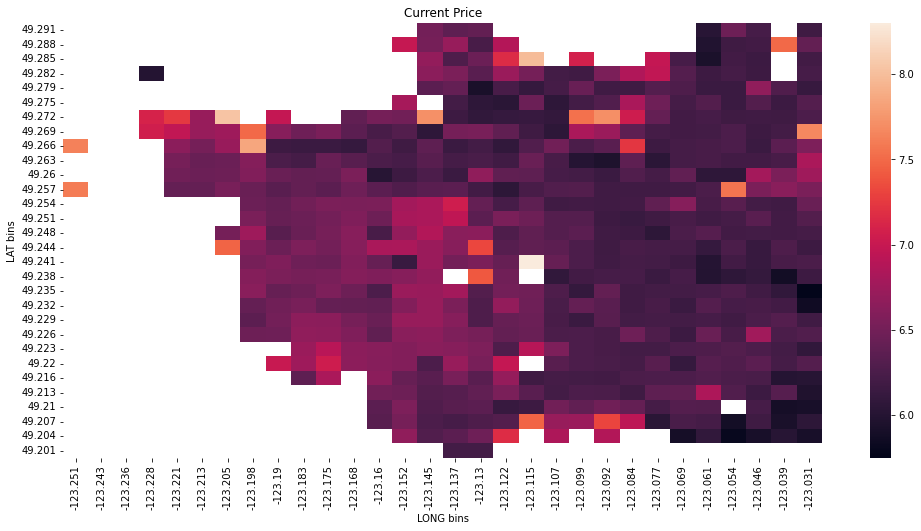

In [25]:
fig, ax = plt.subplots(figsize=(17,8))  
sns.heatmap(z[0]['CURRENT_PRICE'],xticklabels = z[0]['CURRENT_PRICE'].columns.map(lambda x : x.left),
                        yticklabels = z[0]['CURRENT_PRICE'].index.map(lambda x : x.left))

plt.title('Current Price')

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. Figure looks like vancouver map
2. The area near downton and East Hastings street is costly and the areas near south eastern vancouver are affordable.
3. The Current_Price generally is in decreasing trend from west to east direction of the city


### Optional Task 9: Further exploration

This Assignment is due while you're also working on your Blog posts. To give you enough time to do a good job on your article, we dropped a more involved Part 2.

If you want to go further after starting out with the spatial data above, have a look at the material and tutorials of Geoff Boeing's [OSMnx](https://github.com/gboeing/osmnx). It can interface with the open street map API and pull further data (such as amenities, road network, basemap to put in the background of a plot, etc.)

In case you decide to work on this and would like to share your result, include a single page (or short) PDF that contains a plot and brief paragraph explaining it. Depending on the outcome, we may showcase some of these works in class.

## Submission

You need to complete the first part by filling out this notebook. Please submit <font color="blue">A3.ipynb</font> to the CourSys activity [Assignment 3](https://courses.cs.sfu.ca/2022sp-cmpt-733-g1/+a3/). 